## Evaluate models

In [9]:
import os, subprocess, re, ast, pickle

In [10]:
kitti_model_names = [
                "hv_pointpillars_secfpn_fp16_6x8_160e_kitti-3d-car", 
                "hv_pointpillars_secfpn_fp16_6x8_160e_kitti-3d-car-eloss" , 
                "hv_second_secfpn_fp16_6x8_80e_kitti-3d-car", 
                "hv_second_secfpn_fp16_6x8_80e_kitti-3d-car-eloss"]
nus_model_names = [
                "hv_pointpillars_secfpn_sbn-all_fp16_4x8_2x_nus-3d", 
                "hv_pointpillars_secfpn_sbn-all_fp16_4x8_2x_nus-3d-eloss"]

In [11]:
kitti_eval_results = []
for model_name in kitti_model_names:
    model_root = f"checkpoints/{model_name}"
    config_file_name = f"{model_name}.py"
    config_file_path = os.path.join(model_root, config_file_name)
    
    if os.path.exists(os.path.join(model_root, "eval_result.pickle")):
        print(model_name)
        with open(os.path.join(model_root, "eval_result.pickle"), "rb") as f:
            eval_result = pickle.load(f)
    else:
        print(model_name)
        eval_result = []
        for epoch in range(1, 21):
            checkpoint_path = os.path.join(model_root, f"epoch_{epoch}.pth")
            command = f"tools/dist_test.sh {config_file_path} {checkpoint_path} 7 --eval mAP"
            process = subprocess.Popen(command,shell=True,stdout=subprocess.PIPE)
            out = process.stdout.read().decode("gbk")
            pattern = re.compile("{'.*:.*}")
            dict_string = pattern.search(out).group()
            eval_dict = ast.literal_eval(dict_string.replace("nan", "None"))
            eval_result.append(eval_dict)

        with open(os.path.join(model_root, "eval_result.pickle"), "wb") as f:
            pickle.dump(eval_result, f)
            
    if os.path.exists(os.path.join(model_root, "eval_result_21e-40e.pickle")):
        print(model_name)
        with open(os.path.join(model_root, "eval_result_21e-40e.pickle"), "rb") as f:
            eval_result += pickle.load(f)
            
    kitti_eval_results.append(eval_result)

hv_pointpillars_secfpn_fp16_6x8_160e_kitti-3d-car
hv_pointpillars_secfpn_fp16_6x8_160e_kitti-3d-car
hv_pointpillars_secfpn_fp16_6x8_160e_kitti-3d-car-eloss
hv_pointpillars_secfpn_fp16_6x8_160e_kitti-3d-car-eloss
hv_second_secfpn_fp16_6x8_80e_kitti-3d-car
hv_second_secfpn_fp16_6x8_80e_kitti-3d-car-eloss


In [12]:
# for model_name in kitti_model_names[:2]:
#     model_root = f"checkpoints/{model_name}"
#     config_file_name = f"{model_name}.py"
#     config_file_path = os.path.join(model_root, config_file_name)

#     print(model_name)
#     eval_result = []
#     for epoch in range(21, 41):
#         checkpoint_path = os.path.join(model_root, f"epoch_{epoch}.pth")
#         command = f"tools/dist_test.sh {config_file_path} {checkpoint_path} 8 --eval mAP"
#         process = subprocess.Popen(command,shell=True,stdout=subprocess.PIPE)
#         out = process.stdout.read().decode("gbk")
#         pattern = re.compile("{'.*:.*}")
#         dict_string = pattern.search(out).group()
#         eval_dict = ast.literal_eval(dict_string.replace("nan", "None"))
#         eval_result.append(eval_dict)

#     with open(os.path.join(model_root, "eval_result_21e-40e.pickle"), "wb") as f:
#         pickle.dump(eval_result, f)

In [13]:
nus_eval_results = []
for model_name in nus_model_names:
    model_root = f"checkpoints/{model_name}"
    config_file_name = f"{model_name}.py"
    config_file_path = os.path.join(model_root, config_file_name)

    if os.path.exists(os.path.join(model_root, "eval_result.pickle")):
        print(model_name)
        with open(os.path.join(model_root, "eval_result.pickle"), "rb") as f:
            eval_result = pickle.load(f)
    else:
        print(model_name)
        eval_result = []
        for epoch in range(1, 21):
            checkpoint_path = os.path.join(model_root, f"epoch_{epoch}.pth")
            command = f"tools/dist_test.sh {config_file_path} {checkpoint_path} 7 --eval mAP >> {model_name}_history.txt"
            os.system(command)
            
        with open(f"{model_name}_history.txt", "r") as f:
            content = f.read()

        pattern = re.compile("{'.*:.*}")
        dict_string_iter = pattern.finditer(content)

        eval_result = []
        for dict_string in dict_string_iter:
            eval_dict = ast.literal_eval(dict_string.group().replace("nan", "None"))
            eval_result.append(eval_dict)

        with open(os.path.join(model_root, "eval_result.pickle"), "wb") as f:
            pickle.dump(eval_result, f)
    
    if os.path.exists(os.path.join(model_root, "eval_result_21e-24e.pickle")):
        print(model_name)
        with open(os.path.join(model_root, "eval_result_21e-24e.pickle"), "rb") as f:
            eval_result += pickle.load(f)

    nus_eval_results.append(eval_result)

hv_pointpillars_secfpn_sbn-all_fp16_4x8_2x_nus-3d
hv_pointpillars_secfpn_sbn-all_fp16_4x8_2x_nus-3d
hv_pointpillars_secfpn_sbn-all_fp16_4x8_2x_nus-3d-eloss
hv_pointpillars_secfpn_sbn-all_fp16_4x8_2x_nus-3d-eloss


In [14]:
# for model_name in nus_model_names:
#     model_root = f"checkpoints/{model_name}"
#     config_file_name = f"{model_name}.py"
#     config_file_path = os.path.join(model_root, config_file_name)

#     print(model_name)
#     eval_result = []
#     for epoch in range(21, 25):
#         checkpoint_path = os.path.join(model_root, f"epoch_{epoch}.pth")
#         command = f"tools/dist_test.sh {config_file_path} {checkpoint_path} 8 --eval mAP >> {model_name}_history_21e-24e.txt"
#         os.system(command)

#     with open(f"{model_name}_history_21e-24e.txt", "r") as f:
#         content = f.read()

#     pattern = re.compile("{'.*:.*}")
#     dict_string_iter = pattern.finditer(content)

#     eval_result = []
#     for dict_string in dict_string_iter:
#         eval_dict = ast.literal_eval(dict_string.group().replace("nan", "None"))
#         eval_result.append(eval_dict)

#     with open(os.path.join(model_root, "eval_result_21e-24e.pickle"), "wb") as f:
#         pickle.dump(eval_result, f)

## Plot graph

In [15]:
import re, ast, pandas, seaborn
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

In [16]:
kitti_eval_results

[[{'KITTI/Car_3D_AP11_easy_strict': 21.695796548535604,
   'KITTI/Car_BEV_AP11_easy_strict': 48.90512194302167,
   'KITTI/Car_2D_AP11_easy_strict': 63.540591224152834,
   'KITTI/Car_3D_AP11_moderate_strict': 16.111620161296187,
   'KITTI/Car_BEV_AP11_moderate_strict': 34.732389032934854,
   'KITTI/Car_2D_AP11_moderate_strict': 40.55552326332377,
   'KITTI/Car_3D_AP11_hard_strict': 13.079570763312413,
   'KITTI/Car_BEV_AP11_hard_strict': 28.586815962320305,
   'KITTI/Car_2D_AP11_hard_strict': 38.73135763818381,
   'KITTI/Car_3D_AP11_easy_loose': 76.53541726303061,
   'KITTI/Car_BEV_AP11_easy_loose': 86.69537333423162,
   'KITTI/Car_2D_AP11_easy_loose': 63.540591224152834,
   'KITTI/Car_3D_AP11_moderate_loose': 51.032454745939916,
   'KITTI/Car_BEV_AP11_moderate_loose': 60.35456691202569,
   'KITTI/Car_2D_AP11_moderate_loose': 40.55552326332377,
   'KITTI/Car_3D_AP11_hard_loose': 42.668146949381004,
   'KITTI/Car_BEV_AP11_hard_loose': 51.562569781205326,
   'KITTI/Car_2D_AP11_hard_loose'

In [17]:
nus_eval_results

[[{'pts_bbox_NuScenes/car_AP_dist_0.5': 0.2053,
   'pts_bbox_NuScenes/car_AP_dist_1.0': 0.3535,
   'pts_bbox_NuScenes/car_AP_dist_2.0': 0.4235,
   'pts_bbox_NuScenes/car_AP_dist_4.0': 0.4827,
   'pts_bbox_NuScenes/car_trans_err': 0.3969,
   'pts_bbox_NuScenes/car_scale_err': 0.1861,
   'pts_bbox_NuScenes/car_orient_err': 0.8854,
   'pts_bbox_NuScenes/car_vel_err': 1.1912,
   'pts_bbox_NuScenes/car_attr_err': 0.3733,
   'pts_bbox_NuScenes/mATE': 0.7367,
   'pts_bbox_NuScenes/mASE': 0.4228,
   'pts_bbox_NuScenes/mAOE': 1.2612,
   'pts_bbox_NuScenes/mAVE': 1.4906,
   'pts_bbox_NuScenes/mAAE': 0.4553,
   'pts_bbox_NuScenes/truck_AP_dist_0.5': 0.0,
   'pts_bbox_NuScenes/truck_AP_dist_1.0': 0.0101,
   'pts_bbox_NuScenes/truck_AP_dist_2.0': 0.0327,
   'pts_bbox_NuScenes/truck_AP_dist_4.0': 0.0598,
   'pts_bbox_NuScenes/truck_trans_err': 0.704,
   'pts_bbox_NuScenes/truck_scale_err': 0.2964,
   'pts_bbox_NuScenes/truck_orient_err': 1.287,
   'pts_bbox_NuScenes/truck_vel_err': 1.2228,
   'pts_b

In [18]:
kitti_eval_dfs = list(map(lambda x : pandas.DataFrame.from_dict(x), kitti_eval_results))
nus_eval_dfs = list(map(lambda x : pandas.DataFrame.from_dict(x), nus_eval_results))

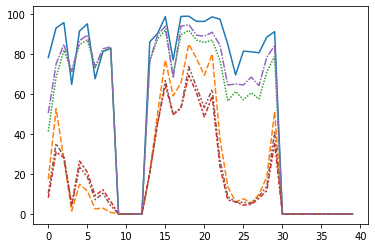

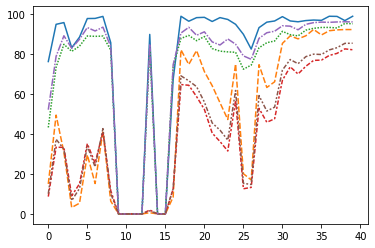

In [19]:
for eval_df in kitti_eval_dfs[:2]:
    seaborn.lineplot(data=eval_df[sorted(filter(lambda x : "AP" in x and "Car_3D" in x and "40" in x, list(eval_df.columns)))], legend = False)
    plt.show()

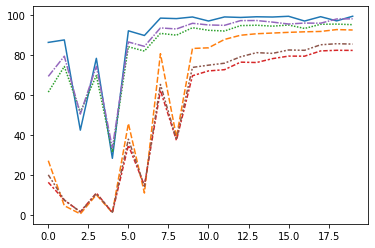

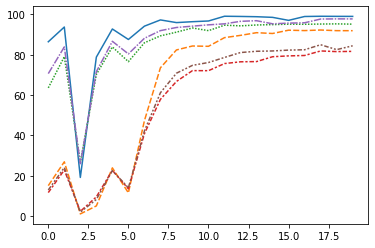

In [27]:
for eval_df in kitti_eval_dfs[2:]:
    seaborn.lineplot(data=eval_df[sorted(filter(lambda x : "AP" in x and "Car_3D" in x and "40" in x, list(eval_df.columns)))], legend = False)
    plt.show()

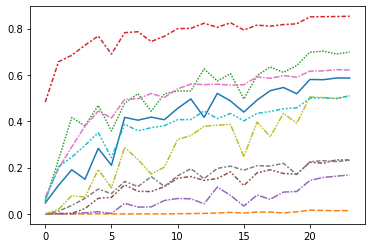

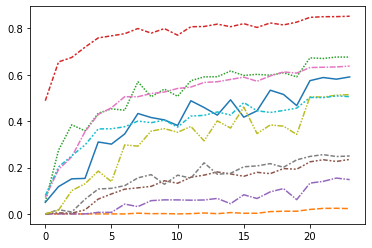

In [25]:
for eval_df in nus_eval_dfs:
    seaborn.lineplot(data=eval_df[sorted(filter(lambda x : "AP" in x and "4.0" in x, list(eval_df.columns)))], legend=False)
    plt.show()

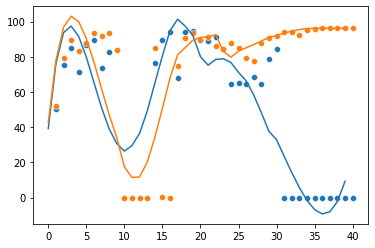

In [31]:
for i,model_name in enumerate(kitti_model_names[:2]):
    data = list(map(lambda x : x["KITTI/Car_3D_AP40_moderate_loose"], kitti_eval_results[i]))
    seaborn.scatterplot(x=list(range(1,41)), y=data)
    seaborn.lineplot(data=savgol_filter(data,20,4))

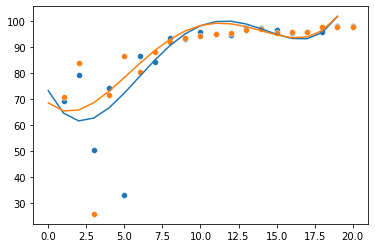

In [35]:
for i,model_name in enumerate(kitti_model_names[:2]):
    data = list(map(lambda x : x["KITTI/Car_3D_AP40_moderate_loose"], kitti_eval_results[2+i]))
    seaborn.scatterplot(x=list(range(1,21)), y=data)
    seaborn.lineplot(data=savgol_filter(data,20,4))